In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

with open("train_test_splilts.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)


In [3]:
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (117, 2)
X_test : (30, 2)


In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
model = Sequential([
    Dense(3, activation='relu', input_shape=(2,)),
    Dropout(0.4),
    Dense(5, activation='relu'),
    Dense(3, activation='softmax'),
])

c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs = 50,
                    batch_size=32)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1538 - loss: 1.1442 - val_accuracy: 0.1000 - val_loss: 1.0922
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2308 - loss: 1.1474 - val_accuracy: 0.2000 - val_loss: 1.0841
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2821 - loss: 1.1406 - val_accuracy: 0.4667 - val_loss: 1.0767
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4274 - loss: 1.1152 - val_accuracy: 0.5667 - val_loss: 1.0693
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4786 - loss: 1.1392 - val_accuracy: 0.6000 - val_loss: 1.0619
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5128 - loss: 1.1021 - val_accuracy: 0.6667 - val_loss: 1.0549
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5299 - loss: 1.1008 - val_accuracy: 0.7667 - val_loss: 1.0482
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5128 - loss: 1.0818 - val_accuracy: 0.7000 - val_loss: 1.0420


In [9]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7000 - loss: 0.8166
Test Accuracy: 0.7000


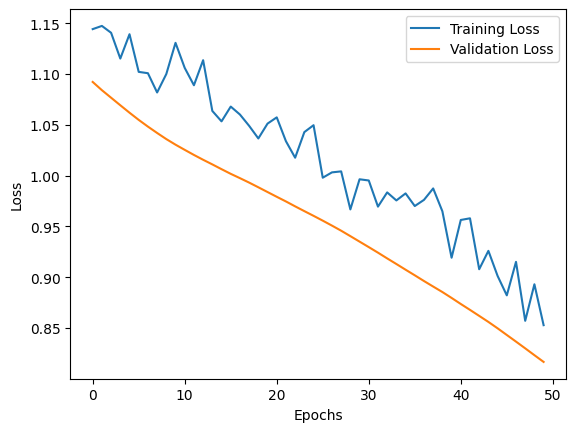

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

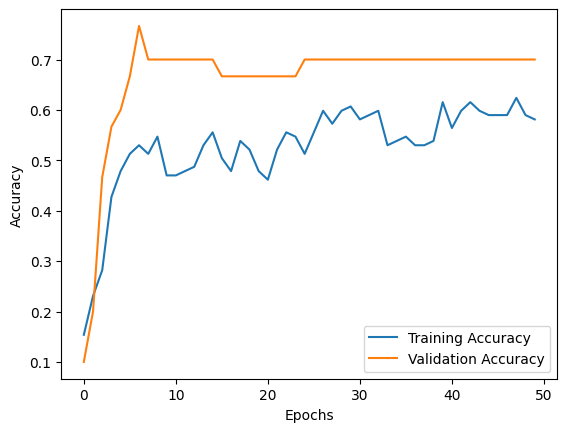

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()